Read data from AcrMap file

In [4]:
import fiona

path = "MekongDelta_Data/1_AllNodeData.shp"

with fiona.open(path, 'r') as src:
    for feature in src:
        print(feature['geometry'])


fiona.Geometry(coordinates=(696169.6512000002, 1205836.6405999996), type='Point')
fiona.Geometry(coordinates=(689133.0970000001, 1164314.0599000007), type='Point')
fiona.Geometry(coordinates=(680798.7052999996, 1162726.5567000005), type='Point')
fiona.Geometry(coordinates=(629196.0, 1225162.9999000002), type='Point')
fiona.Geometry(coordinates=(601711.0, 1198202.9999000002), type='Point')
fiona.Geometry(coordinates=(546559.0, 1212198.9999000002), type='Point')
fiona.Geometry(coordinates=(644286.1322999997, 1144867.1459999997), type='Point')
fiona.Geometry(coordinates=(648232.9463, 1139094.5917000007), type='Point')
fiona.Geometry(coordinates=(647858.0143999998, 1127801.4869), type='Point')
fiona.Geometry(coordinates=(608567.3108000001, 1131373.3690000009), type='Point')
fiona.Geometry(coordinates=(600096.1174999997, 1135958.4133000001), type='Point')
fiona.Geometry(coordinates=(584065.8715000004, 1142705.3432999998), type='Point')
fiona.Geometry(coordinates=(567605.1696142908, 1156073.

In [5]:
import fiona
from shapely.geometry import shape
import pandas as pd
import matplotlib.pyplot as plt

# shapefile path
path = "MekongDelta_Data/1_AllNodeData.shp"

# Open file shapefile
features = []
with fiona.open(path, 'r') as src:
    for f in src:
        geom = shape(f['geometry'])
        props = f['properties']
        props['x'] = geom.x
        props['y'] = geom.y
        features.append(props)

# Transform to DataFrame
df = pd.DataFrame(features)
print(df.head())

   Id       Xcoord        Ycoord            x             y
0   0  696169.6512  1.205837e+06  696169.6512  1.205837e+06
1   0  689133.0970  1.164314e+06  689133.0970  1.164314e+06
2   0  680798.7053  1.162727e+06  680798.7053  1.162727e+06
3   0  629196.0000  1.225163e+06  629196.0000  1.225163e+06
4   0  601711.0000  1.198203e+06  601711.0000  1.198203e+06


/var/folders/h2/d9kh_4lx0xqb4w42jm_jrvbw0000gn/T/ipykernel_4259/4182712283.py:15: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['x'] = geom.x
/var/folders/h2/d9kh_4lx0xqb4w42jm_jrvbw0000gn/T/ipykernel_4259/4182712283.py:16: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['y'] = geom.y


# Draw the nodes on the graph

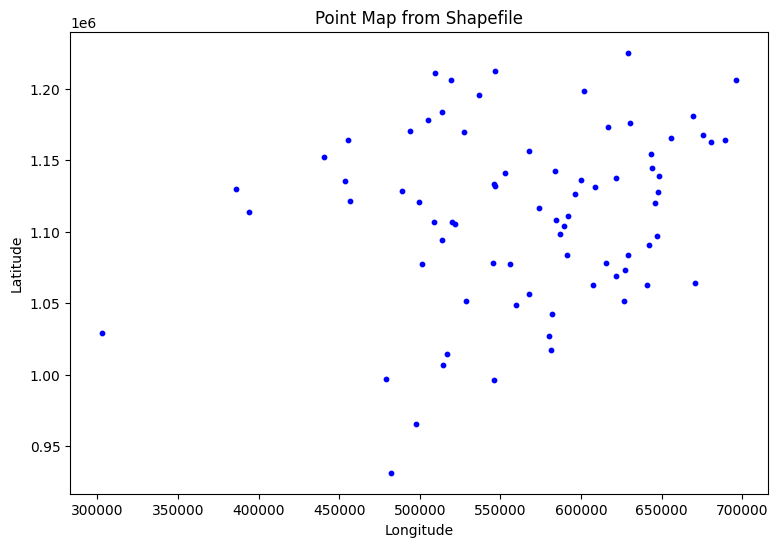

In [6]:
plt.figure(figsize=(9,6))
plt.scatter(df['x'], df['y'], s=10, color='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Point Map from Shapefile")
plt.show()

# Read data of waterway project

In [7]:
import fiona
from shapely.geometry import shape, LineString
import pandas as pd
import matplotlib.pyplot as plt

path = "MekongDelta_Data/3_WaterwayProject.shp"

features = []
with fiona.open(path, 'r') as src:
    for f in src:
        geom = shape(f['geometry'])
        props = f['properties']

        # Nếu là LineString
        if isinstance(geom, LineString):
            coords = list(geom.coords)
            props['num_points'] = len(coords)
            props['coords'] = coords  # lưu toàn bộ danh sách toạ độ

        features.append(props)

df = pd.DataFrame(features)
print(df.head())



  Class ID_DuAn                                               Name  OBJECTID  \
0   IWT    TR26                    Kênh Mương Khai  - Đốc Phủ Hiền         1   
1   IWT    TR27  Kênh tuyến đường thủy từ ngã 3 sông Tiền - sôn...         2   
2   IWT    TR28        Kênh tuyến đường thủy tại cửa sông Cổ Chiên         3   
3   IWT    TR30           Kênh tuyến đường thủy Rạch Giá - Hà Tiên         4   
4   IWT    TR31                                 Kênh Quan Chánh Bố         5   

     Phase    Shape_Leng                                             coords  \
0  Phase 1  35016.087597  [(572485.2120000003, 1123147.4107000008, 0.0),...   
1  Phase 2  29306.393057  [(600665.6659000004, 1136015.5482, 0.0), (6062...   
2  Phase 2  14527.385649  [(671960.1187000005, 1087686.7532000002, 0.0),...   
3  Phase 1  80029.349025  [(444551.1445000004, 1147753.9063000008, 0.0),...   
4  Phase 2  28341.729517  [(640950.5658999998, 1062523.8928999994, 0.0),...   

   num_points  
0          15  
1          1

/var/folders/h2/d9kh_4lx0xqb4w42jm_jrvbw0000gn/T/ipykernel_4259/819139826.py:17: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['num_points'] = len(coords)
/var/folders/h2/d9kh_4lx0xqb4w42jm_jrvbw0000gn/T/ipykernel_4259/819139826.py:18: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  props['coords'] = coords  # lưu toàn bộ danh sách toạ độ


In [8]:
df

,Class,ID_DuAn,Name,OBJECTID,Phase,Shape_Leng,coords,num_points
0,IWT,TR26,Kênh Mương Khai - Đốc Phủ Hiền,1,Phase 1,35016.087597,"[(572485.2120000003, 1123147.4107000008, 0.0),...",15
1,IWT,TR27,Kênh tuyến đường thủy từ ngã 3 sông Tiền - sôn...,2,Phase 2,29306.393057,"[(600665.6659000004, 1136015.5482, 0.0), (6062...",11
2,IWT,TR28,Kênh tuyến đường thủy tại cửa sông Cổ Chiên,3,Phase 2,14527.385649,"[(671960.1187000005, 1087686.7532000002, 0.0),...",4
3,IWT,TR30,Kênh tuyến đường thủy Rạch Giá - Hà Tiên,4,Phase 1,80029.349025,"[(444551.1445000004, 1147753.9063000008, 0.0),...",15
4,IWT,TR31,Kênh Quan Chánh Bố,5,Phase 2,28341.729517,"[(640950.5658999998, 1062523.8928999994, 0.0),...",8
5,IWT,TR32,Cửa Định An (nạo vét),6,Phase 1,23590.046876,"[(646406.4948000005, 1056296.8367999997, 0.0),...",5
6,IWT,TR33,Cửa Bồ Đề (nạo vét),7,Phase 3,20762.881334,"[(477799.4428000003, 965349.7728000004, 0.0), ...",6
7,IWT,TR25,Kênh Chợ Gạo,9,Phase 1,26924.346015,"[(653493.2197000002, 1143322.9671, 0.0), (6541...",108
8,IWT,TR34,Tuyến sông Hậu hệ thống VTS,15,Phase 2,225810.914181,"[(511087.08660000004, 1207283.7953999992, 0.0)...",352
9,IWT,TR29,Hành lang Cần Thơ - HCM,16,Phase 1,169794.330156,"[(599270.0246000001, 1098946.1279000007, 0.0),...",177


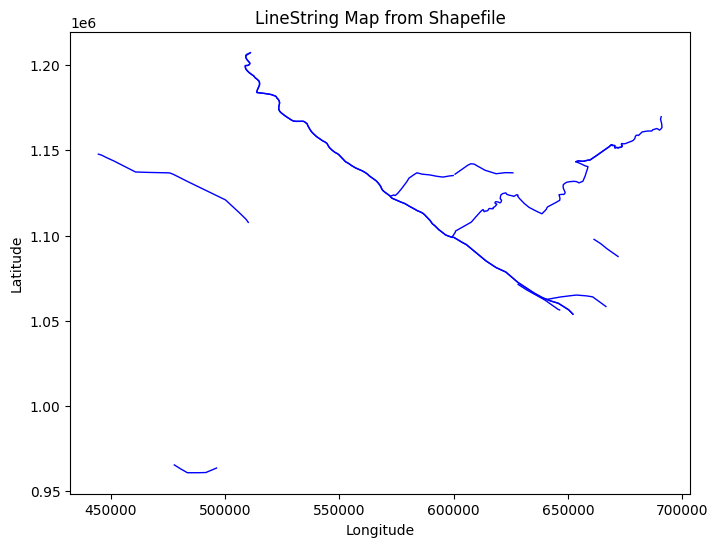

In [9]:
plt.figure(figsize=(8,6))

with fiona.open(path, 'r') as src:
    for f in src:
        geom = shape(f['geometry'])
        if isinstance(geom, LineString):
            x, y = geom.xy
            plt.plot(x, y, color='blue', linewidth=1)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("LineString Map from Shapefile")
plt.show()


# Read and display all node data of Mekong Network

In [46]:
start_x, start_y, end_x, end_y = [], [], [], []

with fiona.open(path, 'r') as src:
    for f in src:
        geom = shape(f['geometry'])
        if isinstance(geom, LineString):
            start = geom.coords[0]
            end = geom.coords[-1]
            start_x.append(start[0])
            start_y.append(start[1])
            end_x.append(end[0])
            end_y.append(end[1])

df_lines = pd.DataFrame({
    "start_x": start_x,
    "start_y": start_y,
    "end_x": end_x,
    "end_y": end_y
})

print(df_lines.head())


       start_x       start_y        end_x         end_y
0  664924.2793  1.071739e+06  638105.7291  1.076749e+06
1  585663.9141  1.110725e+06  553418.2743  1.140093e+06
2  643333.0552  1.154764e+06  648043.1487  1.163800e+06
3  601656.1426  1.196087e+06  628484.0838  1.190835e+06
4  591135.8020  1.102899e+06  591148.3532  1.102889e+06


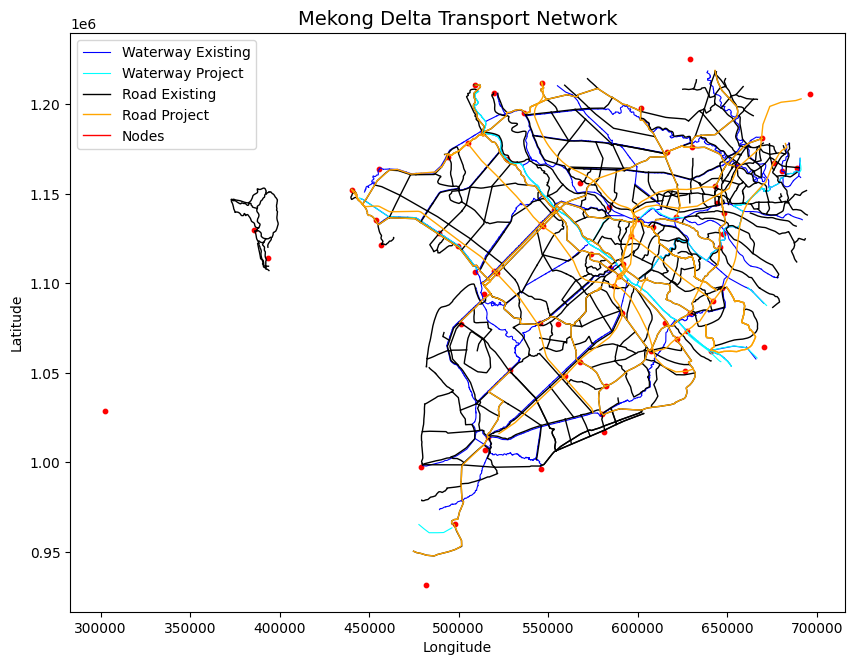

In [10]:
import fiona
from shapely.geometry import shape, Point, LineString, MultiLineString
import matplotlib.pyplot as plt

base_path = "MekongDelta_Data/"
files = {
    "Nodes": base_path + "1_AllNodeData.shp",
    "Road_Existing": base_path + "2_RoadExisting.shp",
    "Road_Project": base_path + "2_RoadProject.shp",
    "Waterway_Existing": base_path + "3_WaterwayExisting.shp",
    "Waterway_Project": base_path + "3_WaterwayProject.shp"
}

def plot_shapefile(ax, path, color, marker=None, linewidth=1, label=None):
    with fiona.open(path, 'r') as src:
        for feature in src:
            geom = shape(feature['geometry'])
            
            # Points
            if isinstance(geom, Point):
                ax.scatter(geom.x, geom.y, color=color, s=10, marker=marker)
            
            # Line String
            elif isinstance(geom, LineString):
                x, y = geom.xy
                ax.plot(x, y, color=color, linewidth=linewidth)
            
            # Multi Line String
            elif isinstance(geom, MultiLineString):
                for line in geom.geoms:  # Using .geoms
                    x, y = line.xy
                    ax.plot(x, y, color=color, linewidth=linewidth)

    if label:
        ax.plot([], [], color=color, linewidth=linewidth, label=label)


# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(10, 10))
plot_shapefile(ax, files["Waterway_Existing"], color='blue', linewidth=0.8, label="Waterway Existing")
plot_shapefile(ax, files["Waterway_Project"], color='cyan', linewidth=0.8, label="Waterway Project")
plot_shapefile(ax, files["Road_Existing"], color='black', linewidth=1.0, label="Road Existing")
plot_shapefile(ax, files["Road_Project"], color='orange', linewidth=1.0, label="Road Project")
plot_shapefile(ax, files["Nodes"], color='red', marker='o', label="Nodes")

ax.set_aspect('equal')
ax.set_title("Mekong Delta Transport Network", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


# Display FID of Nodes

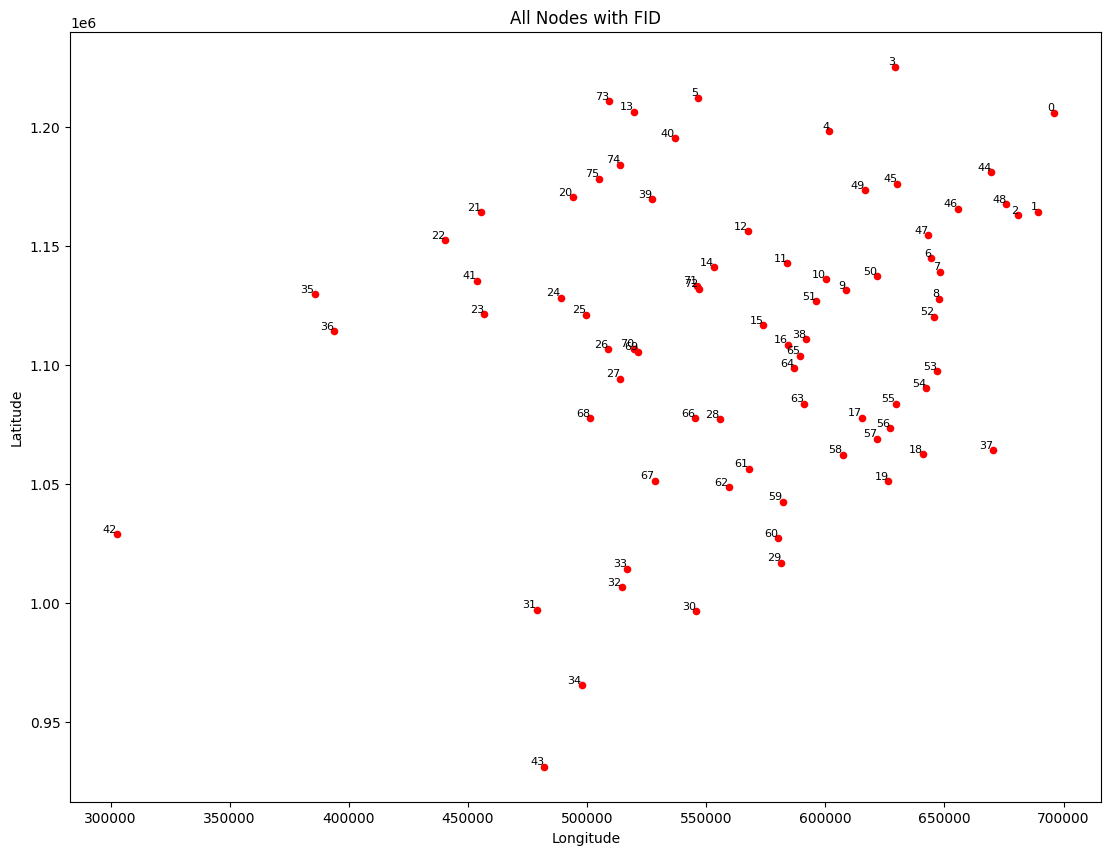

In [11]:
import fiona
from shapely.geometry import shape, Point
import matplotlib.pyplot as plt

path_nodes = "MekongDelta_Data/1_AllNodeData.shp"

fig, ax = plt.subplots(figsize=(15, 10))

# FID
with fiona.open(path_nodes, 'r') as src:
    for feature in src:
        geom = shape(feature['geometry'])
        fid = feature['id']  # FID in 'id' of feature

        # draw all points
        ax.scatter(geom.x, geom.y, color='red', s=20)
        
        # Display all FID of each point
        ax.text(geom.x, geom.y, str(fid), fontsize=8, color='black', ha='right', va='bottom')

ax.set_title("All Nodes with FID")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
plt.show()


# SHORTHEST PATH

In [13]:
import pandas as pd
import heapq
import math
from collections import defaultdict

# 1. Read and adding Edges
def load_graph_from_excel(file_path="Transport_Corridors_MekongDelta.xlsx", sheet_name="ARC-Net"):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.columns = [col.strip() for col in df.columns]
    
    edges = set() 
    seen = set()
    
    for idx, row in df.iterrows():
        try:
            u = int(row['From Node'])
            v = int(row['To Node'])
            typ_raw = row['Type']
            if pd.isna(typ_raw):
                continue
            typ = str(typ_raw).strip().upper()
            if typ not in ['R', 'W']:
                typ = 'R'
            
            length_str = str(row['Length (m)']).replace(',', '').strip()
            length = float(length_str) if length_str.replace('.', '').isdigit() else None
            if length is None:
                continue
            
            # Add both dimensions
            edges.add((u, v, typ, length))
            edges.add((v, u, typ, length)) 
            seen.add((min(u,v), max(u,v)))
            
        except Exception as e:
            print(f"Lỗi dòng {idx+2}: {e}")
    
    edges_list = list(edges)
    print(f"Loaded edge {len(edges_list)}.")
    return edges_list

#2. Building the graph
def build_expanded_graph(edges, switch_cost=2.0):
    G_exp = defaultdict(list)
    for u, v, typ, weight in edges:
        if typ == 'R':
            G_exp[(u, 'R')].append(((v, 'R'), weight))
            G_exp[(u, 'R')].append(((v, 'W'), weight + switch_cost))
        elif typ == 'W':
            G_exp[(u, 'W')].append(((v, 'W'), weight))
            G_exp[(u, 'W')].append(((v, 'R'), weight + switch_cost))
    return G_exp

# 3. Running Dijkstra
def compute_d_prime(G_exp, target):
    targets = {(target, 'R'), (target, 'W')}
    dist = defaultdict(lambda: math.inf)
    pq = []
    for t in targets:
        dist[t] = 0
        heapq.heappush(pq, (0, t))
    
    while pq:
        cost, node = heapq.heappop(pq)
        if cost > dist[node]:
            continue
        for neigh, w in G_exp[node]:
            new_cost = cost + w
            if new_cost < dist[neigh]:
                dist[neigh] = new_cost
                heapq.heappush(pq, (new_cost, neigh))
    return dist

# 4. DFS to find the path
def find_near_optimal_paths(G_exp, d_prime, s, t, epsilon=1.5):
    L_min = min(d_prime.get((s, 'R'), math.inf), d_prime.get((s, 'W'), math.inf))
    if L_min >= math.inf:
        return [], math.inf
    
    bound = (1 + epsilon) * L_min
    results = []

    def dfs(curr, cost, path, visited):
        if cost > bound: return
        if curr[0] == t:
            results.append((path[:], cost))
            return
        lower = d_prime.get(curr, math.inf)
        if cost + lower > bound: return
        
        for next_node, w in G_exp[curr]:
            if next_node[0] in visited: continue
            visited.add(next_node[0])
            path.append(next_node)
            dfs(next_node, cost + w, path, visited)
            path.pop()
            visited.remove(next_node[0])
    
    for mode in ['R', 'W']:
        start = (s, mode)
        if d_prime.get(start, math.inf) >= math.inf: continue
        dfs(start, 0, [start], {s})
    
    results.sort(key=lambda x: x[1])
    return results, L_min

# 5. Debug connectivity
def debug_connectivity(edges, source, dest):
    neighbors_s = {v for u, v, _, _ in edges if u == source} | {u for u, v, _, _ in edges if v == source}
    neighbors_d = {u for u, v, _, _ in edges if v == dest} | {v for u, v, _, _ in edges if u == dest}
    
    print(f"\n[DEBUG] Node {source} connect with: {sorted(neighbors_s)}")
    print(f"[DEBUG] Node {dest} connect with: {sorted(neighbors_d)}")
    
    if not neighbors_s:
        print(f"Node {source} has no edges!")
    if not neighbors_d:
        print(f"Node {dest} has no edges! → Unreachable.")
    return neighbors_s, neighbors_d

# 6. Main
def main():
    SOURCE = 0
    DEST = 15
    EPSILON = 1.5
    SWITCH_COST = 2.0

    print("FIND PATH FROM 0 → 15 (TWO-DIMENSIONAL GRAPH)\n")
    
    edges = load_graph_from_excel()
    if not edges:
        print("No data available!")
        return

    # DEBUG: Checking connectivity
    debug_connectivity(edges, SOURCE, DEST)

    G_exp = build_expanded_graph(edges, SWITCH_COST)
    d_prime = compute_d_prime(G_exp, DEST)

    L_min = min(d_prime.get((SOURCE, 'R'), math.inf), d_prime.get((SOURCE, 'W'), math.inf))
    if L_min >= math.inf:
        print(f"\nNo paht form {SOURCE} to {DEST}!")
        print("→ Check Excel file again: Does Node 15 have an edge??")
        return

    print(f"\nL_min = {L_min:.2f}")
    paths, _ = find_near_optimal_paths(G_exp, d_prime, SOURCE, DEST, EPSILON)

    if not paths:
        print("No near-optimal path found (possibly due to tight bounds).")
        return

    print(f"\nFound {len(paths)} near-optimal path:")
    for i, (path, cost) in enumerate(paths[:5], 1):
        nodes = [n[0] for n in path]
        modes = ''.join(n[1] for n in path)
        print(f"{i}. {nodes} | Mode: {modes} | Length: {cost:.2f}")

    best = paths[0]
    print(f"\nSHORTHEST PATH:")
    print(f"   Path: {[n[0] for n in best[0]]}")
    print(f"   Mode:  {''.join(n[1] for n in best[0])}")
    print(f"   Length:  {best[1]:.2f}")

if __name__ == "__main__":
    main()

FIND PATH FROM 0 → 15 (TWO-DIMENSIONAL GRAPH)

Loaded edge 234.

[DEBUG] Node 0 connect with: [52, 101]
[DEBUG] Node 15 connect with: [14, 37, 78]

L_min = 180518.00

Found 33582 near-optimal path:
1. [0, 52, 68, 72, 74, 37, 15] | Mode: RRRRRRR | Length: 180518.00
2. [0, 52, 68, 72, 74, 37, 15] | Mode: RRRRRRW | Length: 180520.00
3. [0, 52, 68, 72, 14, 15] | Mode: RRRWRR | Length: 185022.00
4. [0, 52, 68, 72, 14, 15] | Mode: RRRWRW | Length: 185024.00
5. [0, 52, 68, 72, 74, 78, 15] | Mode: RRRRRRR | Length: 186051.00

SHORTHEST PATH:
   Path: [0, 52, 68, 72, 74, 37, 15]
   Mode:  RRRRRRR
   Length:  180518.00
